In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D ## 用于3D投影图的库
%matplotlib inline

In [2]:
### 变量声明
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))

### 分配初始条件
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

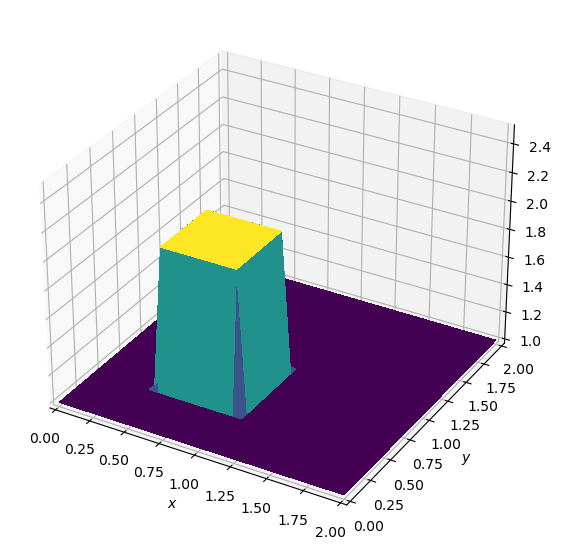

In [3]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection = '3d')
X,Y = numpy.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,rstride = 1,cstride = 1,cmap = cm.viridis,linewidth = 0,antialiased = False)

ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(1,2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{v\Delta t}{\Delta x^2}(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + \frac{v\Delta t}{\Delta y^2}(u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$

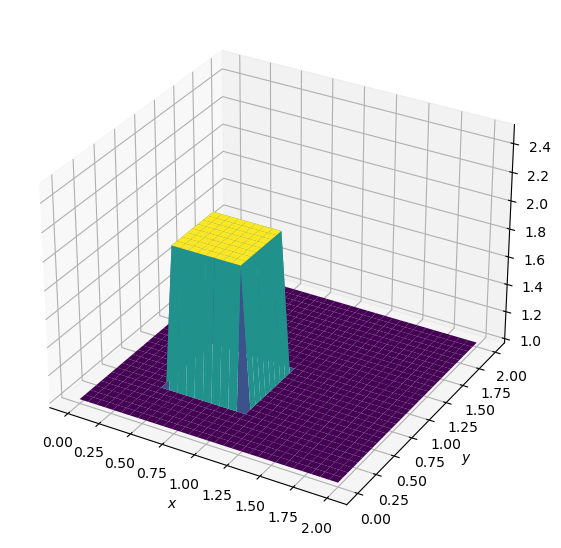

In [4]:
### 通过nt时间段运行
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

    for n in range(nt + 1):
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    fig = pyplot.figure(figsize = (11,7),dpi = 100)
    ax = fig.add_subplot(projection = '3d')
    surf = ax.plot_surface(X,Y,u[:],rstride = 1,cstride = 1,cmap = cm.viridis,linewidth = 0,antialiased = True)
    ax.set_zlim(1,2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

fig = pyplot.figure(figsize = (11,7),dpi = 100)
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X,Y,u[:],rstride = 1,cstride = 1,cmap = cm.viridis,linewidth = 0,antialiased = True)
ax.set_zlim(1,2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');


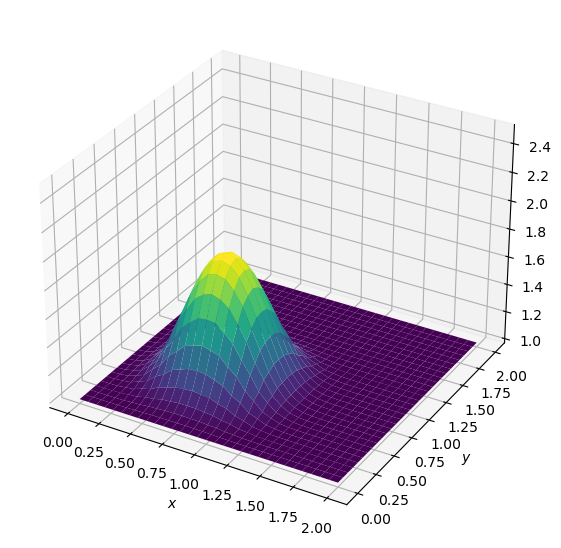

In [5]:
diffuse(10)

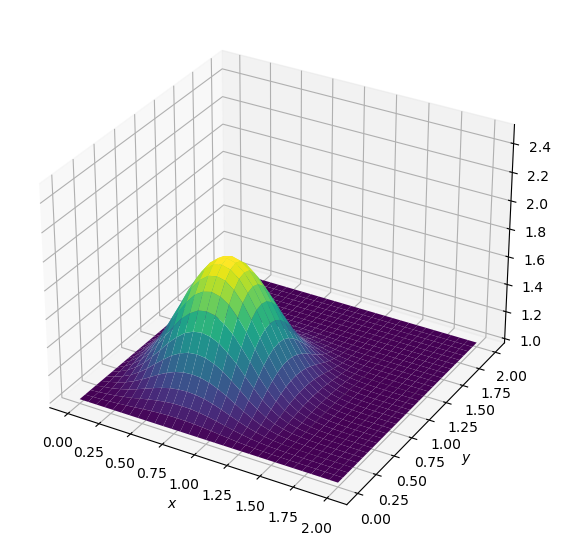

In [6]:
diffuse(14)

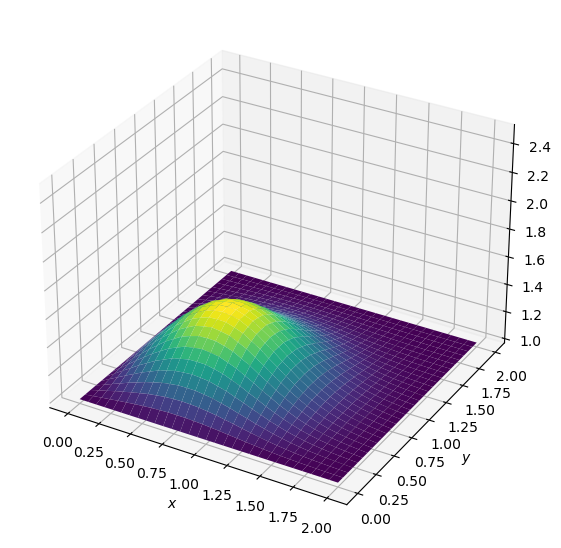

In [7]:
diffuse(50)